<a href="https://colab.research.google.com/github/orionbt1/mgmt467-analytics-portfolio/blob/main/Copy_of_Week5_DataViz_Dashboarding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MGMT 467 — Week 5: Data Visualization & Dashboarding

Instructor: **Prof. Alok R. Chaturvedi**  
Modality: **Guided Inquiry (Tuesday)** + **Hands-on Lab (Thursday)**  
Prepared: 2025-09-23  

---
### Learning Objectives
1. Distinguish **exploratory** vs **explanatory** visualization.  
2. Match common **chart types** to the **questions** they answer.  
3. Design **airline KPIs** and select appropriate visuals.  
4. Use **Gemini** to generate Matplotlib/Seaborn code in Colab.  
5. Build an **interactive dashboard** in Looker Studio using BigQuery/CSV.


## Tuesday (Concepts) — Guided Inquiry

**Instructions:** Answer directly in this notebook. Use short paragraphs and bullet points. When helpful, sketch chart ideas using ASCII or quick scribbles.

### Q1 — Exploratory vs. Explanatory
**Prompt:** *"Explain the difference between exploratory and explanatory visualization."*  
**Hints:** Consider audience, purpose, level of polish, and how much iteration you expect.

📝 **Your response:**
Purpose and audience: Exploratory visualizations are created primarily for the analyst’s own understanding and discovery of patterns, trends, or anomalies in the data, whereas explanatory visualizations are designed to communicate specific insights or conclusions to an external audience.

Level of polish: Exploratory visualizations are often rough, iterative, and flexible, allowing the analyst to test hypotheses and adjust quickly; explanatory visualizations are more polished, carefully designed, and structured to tell a clear and persuasive story.

Iteration and process: Exploratory work involves frequent iteration, experimenting with different variables, chart types, and perspectives, while explanatory visualization focuses on presenting the final, refined message with minimal distraction and maximum clarity.

---
### Q2 — Chart Types & When to Use Them
**Prompt:** *"Describe 5 common chart types (e.g., bar, line, scatter, histogram, map) and the type of data analysis question each is best suited to answer."*  

For each chart, list: **Question archetype**, **Data shape**, **Pitfalls**, **Alternatives**.

📝 **Your response (template):**
1. Bar Chart

Question archetype: “Which category is largest/smallest?” or “How do categories compare?”

Data shape: Categorical data with numeric measures (e.g., sales by region).

Pitfalls: Can be misleading if categories are not sorted or axis scales are distorted; too many bars can clutter the chart.

Alternatives: Column chart (vertical version), stacked bar chart, or dot plot.

2. Line Chart

Question archetype: “How does a value change over time?”

Data shape: Continuous data over an ordered dimension (usually time).

Pitfalls: Too many lines can overwhelm; non-time-series data can make trends misleading; beware of connecting unrelated points.

Alternatives: Area chart, slope chart, or sparkline for compact time trends.

3. Scatter Plot

Question archetype: “Is there a relationship between two variables?” or “Are there clusters or outliers?”

Data shape: Paired numeric data (two continuous variables).

Pitfalls: Overplotting with large datasets can hide patterns; correlation does not imply causation.

Alternatives: Bubble chart (adds size dimension), hexbin plot, or jittered scatter plot.

4. Histogram

Question archetype: “What is the distribution of a variable?” or “Where do values concentrate?”

Data shape: Single continuous variable, divided into bins.

Pitfalls: Bin size choice can distort perception of the distribution; cannot compare multiple groups directly.

Alternatives: Density plot, box plot, or violin plot.

5. Map (Choropleth or Symbol Map)

Question archetype: “How do values vary across geographic locations?”

Data shape: Geographic data linked to numeric or categorical measures.

Pitfalls: Color scales can mislead if not perceptually uniform; small regions may be hard to interpret.

Alternatives: Cartogram, proportional symbol map, or heatmap.

---
### Q3 — Airline Executive Dashboard KPIs
**Prompt:** *"Your goal is to create a dashboard for an airline executive. Brainstorm 5 Key Performance Indicators (KPIs) that should be on this dashboard. For each KPI, suggest the best chart type to visualize it."*

Suggested KPI ideas to consider (customize them): On-Time Rate, Average Delay Minutes, Cancellation Rate, Load Factor, Yield (Revenue per Passenger Mile), Completion Factor, Net Promoter Score (if available), Revenue, Cost per Available Seat Mile (CASM).

📝 **Your response (template):**
1. KPI: On-Time Rate

Why it matters: Measures operational efficiency and customer satisfaction; higher on-time rates reduce disruptions and improve airline reputation.

Best chart: Line chart to show trends over time, or bar chart for comparison across routes.

Drill-down fields: Route, aircraft type, departure airport, time of day.

2. KPI: Average Delay Minutes

Why it matters: Highlights inefficiencies in operations; helps identify systemic issues causing delays.

Best chart: Heatmap (by airport/time) or box plot to show variability and outliers.

Drill-down fields: Route, flight number, delay reason, day of week.

3. KPI: Load Factor

Why it matters: Indicates seat utilization and revenue efficiency; higher load factors typically improve profitability.

Best chart: Gauge chart for current performance or bar/line chart to compare over time.

Drill-down fields: Aircraft type, route, class of service, seasonality.

4. KPI: Yield (Revenue per Passenger Mile)

Why it matters: Measures revenue efficiency; helps understand profitability per mile flown.

Best chart: Line chart for trends, or bubble chart to compare yield versus distance/routes.

Drill-down fields: Route, fare class, season, flight distance.

5. KPI: Cancellation Rate

Why it matters: Impacts customer satisfaction and operational planning; high cancellation rates can indicate operational issues or external factors like weather.

Best chart: Stacked bar chart to show cancellations by reason, or line chart for time trends.

Drill-down fields: Route, flight number, cancellation reason, day of week, airport.


---
## Thursday (Practice) — Colab, Gemini, & Looker Studio

You will:
1) Use **Gemini** in Colab to generate visualization code (Matplotlib/Seaborn).  
2) Use a **synthetic airline dataset** (provided below) *or* connect your own BigQuery data.  
3) Build a **Looker Studio** dashboard for your KPIs.

### Option A — Use Gemini Side Panel in Colab
Open the **Gemini** side panel in Colab ("Extensions" or the right sidebar). Ask it to generate Python code given your prompts and the DataFrame you have in memory. Paste/execute the generated code in new cells.

### Option B — Programmatic Gemini (optional)
If you prefer code, you can install the Generative AI SDK and call Gemini with an API key. (We will not store keys in this notebook.)

> **Reminder:** This course emphasizes **AI-assisted coding**—focus on specifying *clear prompts* and then **reviewing and editing** the generated code for correctness, readability, and ethics.


In [ ]:
# (Optional) Environment setup — run if needed
%%capture
!pip install pandas numpy matplotlib seaborn pyarrow db-dtypes google-cloud-bigquery -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(42)
print('✅ Environment ready')

### Create a Synthetic Airline Dataset (if you don't have one)
Use this dataset to prototype visualizations and dashboards. It contains realistic columns for the KPIs you defined. You can always swap in your BigQuery data later.


In [ ]:
# Generate a synthetic airline dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(467)

dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
carriers = ['AA', 'DL', 'UA', 'WN', 'AS']
origins = ['ATL','DFW','DEN','ORD','LAX','SEA','SFO','PHX','CLT','MCO']
dests =   ['JFK','LGA','BOS','SFO','LAX','SEA','MIA','IAH','IAD','PHL']

rows = []
for d in dates:
    for carrier in carriers:
        # number of flights per day per carrier
        n = np.random.randint(80, 140)
        for _ in range(n):
            o = np.random.choice(origins)
            de = np.random.choice(dests)
            if o == de:
                continue
            distance = np.random.randint(300, 2800)
            seats = np.random.choice([90,120,150,180,210])
            load_factor = np.clip(np.random.normal(0.82, 0.07), 0.55, 0.98)
            pax = int(seats * load_factor)
            dep_delay = int(np.random.normal(8, 15))
            arr_delay = dep_delay + int(np.random.normal(0, 12))
            dep_delay = max(dep_delay, -5)
            arr_delay = max(arr_delay, -10)
            cancelled = np.random.rand() < 0.025
            diverted = np.random.rand() < 0.005
            revenue = pax * np.random.uniform(120, 420)
            casm = np.random.uniform(0.08, 0.16)  # cost per available seat mile
            cost = casm * seats * distance
            fuel_burn = distance * np.random.uniform(3.0, 4.5)  # gallons per seat-mile proxy
            nps = np.random.normal(35, 15)  # if you want a customer metric proxy
            rows.append({
                'date': d,
                'carrier': carrier,
                'origin': o,
                'dest': de,
                'distance_miles': distance,
                'seats': seats,
                'passengers': pax,
                'dep_delay_min': dep_delay,
                'arr_delay_min': arr_delay,
                'cancelled': int(cancelled),
                'diverted': int(diverted),
                'revenue_usd': round(revenue, 2),
                'cost_usd': round(cost, 2),
                'fuel_burn_gal': round(fuel_burn, 1),
                'nps': round(nps, 1)
            })

df_flights = pd.DataFrame(rows)

# Derived KPIs
df_flights['on_time'] = (df_flights['arr_delay_min'] <= 15).astype(int)
df_flights['load_factor'] = (df_flights['passengers'] / df_flights['seats']).round(3)
df_flights['yield_usd_per_pax_mile'] = (df_flights['revenue_usd'] / (df_flights['passengers'] * df_flights['distance_miles']).clip(lower=1)).round(4)
df_flights['asm'] = df_flights['seats'] * df_flights['distance_miles']  # available seat miles
df_flights['casm'] = (df_flights['cost_usd'] / df_flights['asm']).round(4)
df_flights['month'] = df_flights['date'].dt.to_period('M').astype(str)

df_flights.head()

,date,carrier,origin,dest,distance_miles,seats,passengers,dep_delay_min,arr_delay_min,cancelled,...,revenue_usd,cost_usd,fuel_burn_gal,nps,on_time,load_factor,yield_usd_per_pax_mile,asm,casm,month
0,2024-01-01,AA,LAX,IAH,444,180,160,-5,-10,0,...,26076.49,8301.98,1904.6,53.4,1,0.889,0.3671,79920,0.1039,2024-01
1,2024-01-01,AA,SEA,PHL,601,150,141,10,7,0,...,17561.91,8739.75,2237.5,60.9,1,0.940,0.2072,90150,0.0969,2024-01
2,2024-01-01,AA,LAX,IAD,749,120,100,13,22,0,...,15355.61,12241.65,3076.5,54.1,0,0.833,0.2050,89880,0.1362,2024-01
3,2024-01-01,AA,DFW,BOS,2153,210,169,13,14,0,...,42122.37,65961.23,6642.2,37.0,1,0.805,0.1158,452130,0.1459,2024-01
4,2024-01-01,AA,CLT,SEA,558,90,75,9,-5,0,...,26418.88,7144.23,2142.3,56.3,1,0.833,0.6313,50220,0.1423,2024-01


### Use Gemini to Generate Visualization Code
Copy/paste these **prompts** into Gemini (Colab side panel). After it generates code, paste it into a new cell and run. **Inspect and fix** anything that looks off.

#### Prompt A — On-Time Rate by Carrier (Bar Chart)
```
You are a Python data viz expert. Given a pandas DataFrame `df_flights` with columns including `carrier` and `on_time` (1/0), write Matplotlib/Seaborn code to compute and plot **On-Time Rate by carrier** as a sorted bar chart with percentage labels on bars. Use a clean style, readable labels, and tight layout. Do not use Plotly.
```

#### Prompt B — Average Arrival Delay over Time (Line Chart)
```
Given `df_flights` with `date` (datetime) and `arr_delay_min`, write code to aggregate to daily average arrival delay and plot a **line chart** with a 7-day rolling average overlay. Add axis labels, title, and grid.
```

#### Prompt C — Delay Distribution (Histogram)
```
Given `df_flights` with `arr_delay_min`, write code to plot a **histogram** of arrival delays with appropriate bins, a vertical reference line at 0, and annotate percent of flights within [-5, 15] minutes.
```

#### Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
```
Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.
```

#### Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
```
Given `df_flights` with `cost_usd`, `revenue_usd`, and `casm`, produce a **scatter plot** of cost vs. revenue with points colored by `casm` (continuous colormap) and add a diagonal y=x reference line. Include labels and legend.
```


/tmp/ipython-input-3464321048.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=on_time_by_carrier.index, y=on_time_by_carrier.values, palette='viridis')


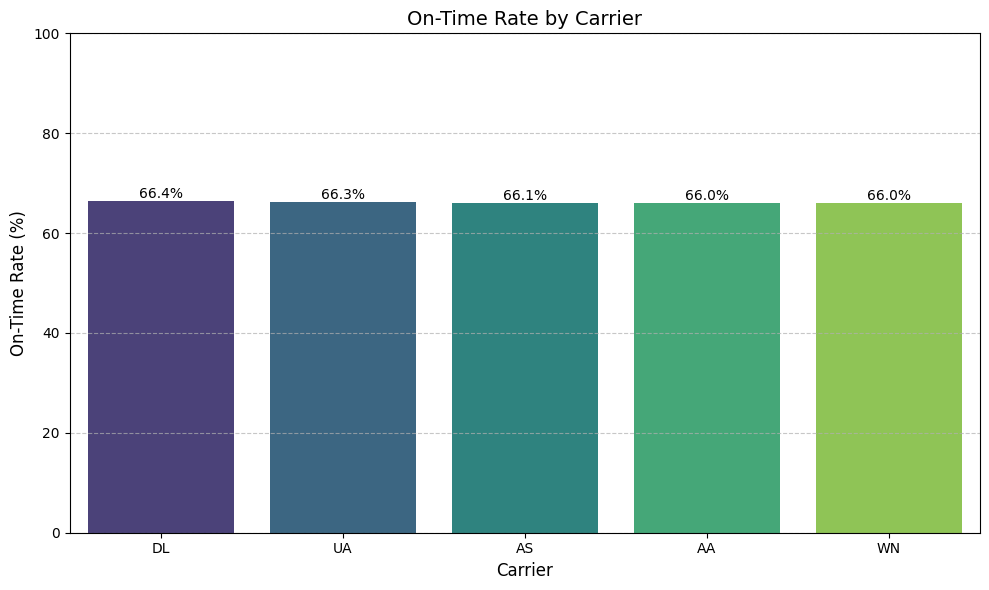

In [ ]:
# Calculate On-Time Rate by carrier
on_time_by_carrier = df_flights.groupby('carrier')['on_time'].mean().sort_values(ascending=False) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=on_time_by_carrier.index, y=on_time_by_carrier.values, palette='viridis')

# Add percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('On-Time Rate by Carrier', fontsize=14)
plt.xlabel('Carrier', fontsize=12)
plt.ylabel('On-Time Rate (%)', fontsize=12)
plt.ylim(0, 100) # Set y-axis limit to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

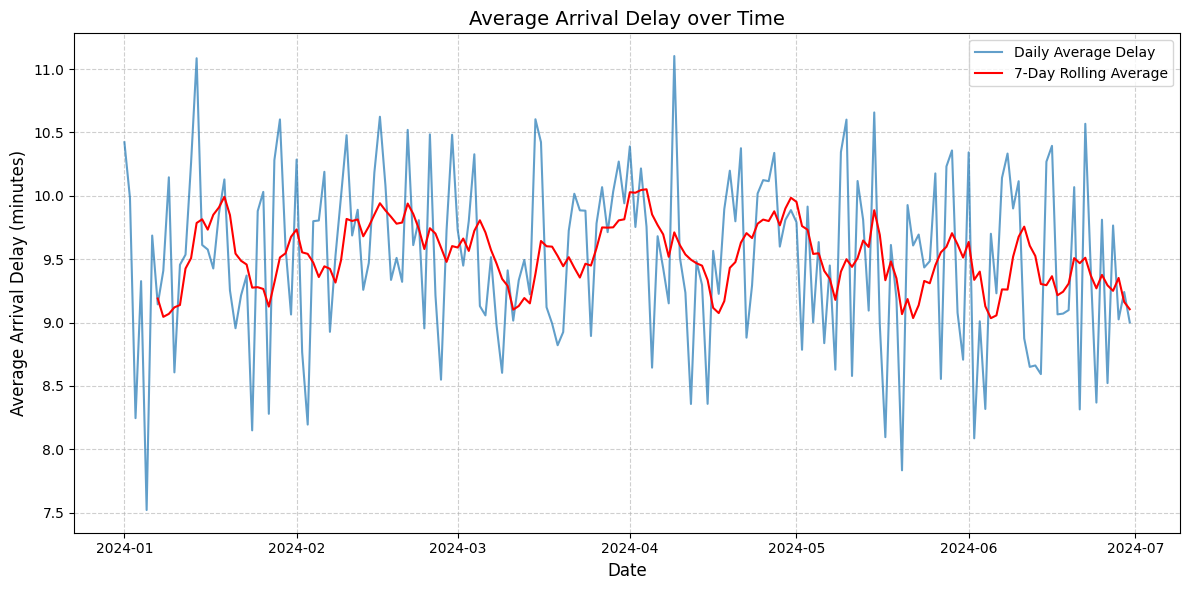

In [ ]:
# Aggregate to daily average arrival delay
daily_avg_delay = df_flights.groupby('date')['arr_delay_min'].mean()

# Calculate 7-day rolling average
rolling_avg_delay = daily_avg_delay.rolling(window=7).mean()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_delay.index, daily_avg_delay.values, label='Daily Average Delay', alpha=0.7)
plt.plot(rolling_avg_delay.index, rolling_avg_delay.values, label='7-Day Rolling Average', color='red')

plt.title('Average Arrival Delay over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Arrival Delay (minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

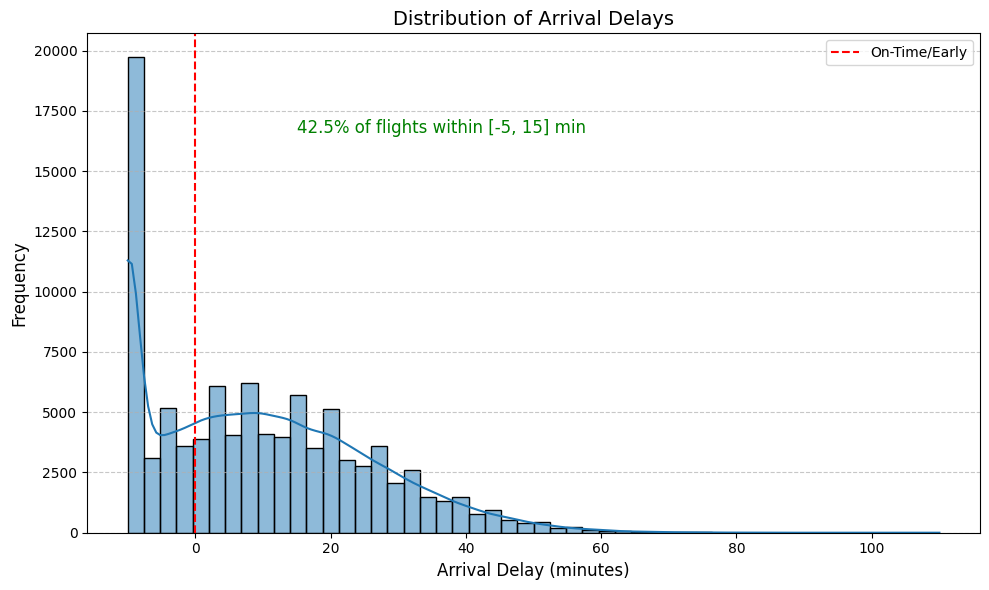

In [ ]:
# Create the histogram of arrival delays
plt.figure(figsize=(10, 6))
sns.histplot(df_flights['arr_delay_min'], bins=50, kde=True)

# Add a vertical reference line at 0
plt.axvline(0, color='red', linestyle='--', label='On-Time/Early')

# Calculate the percentage of flights within [-5, 15] minutes
on_time_flights = df_flights[(df_flights['arr_delay_min'] >= -5) & (df_flights['arr_delay_min'] <= 15)]
percentage_on_time = (len(on_time_flights) / len(df_flights)) * 100

# Annotate the percentage on the plot
plt.text(15, plt.ylim()[1] * 0.8, f'{percentage_on_time:.1f}% of flights within [-5, 15] min',
         horizontalalignment='left', color='green', fontsize=12)


plt.title('Distribution of Arrival Delays', fontsize=14)
plt.xlabel('Arrival Delay (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2961029303.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_routes.values, y=top_15_routes.index, palette='viridis')


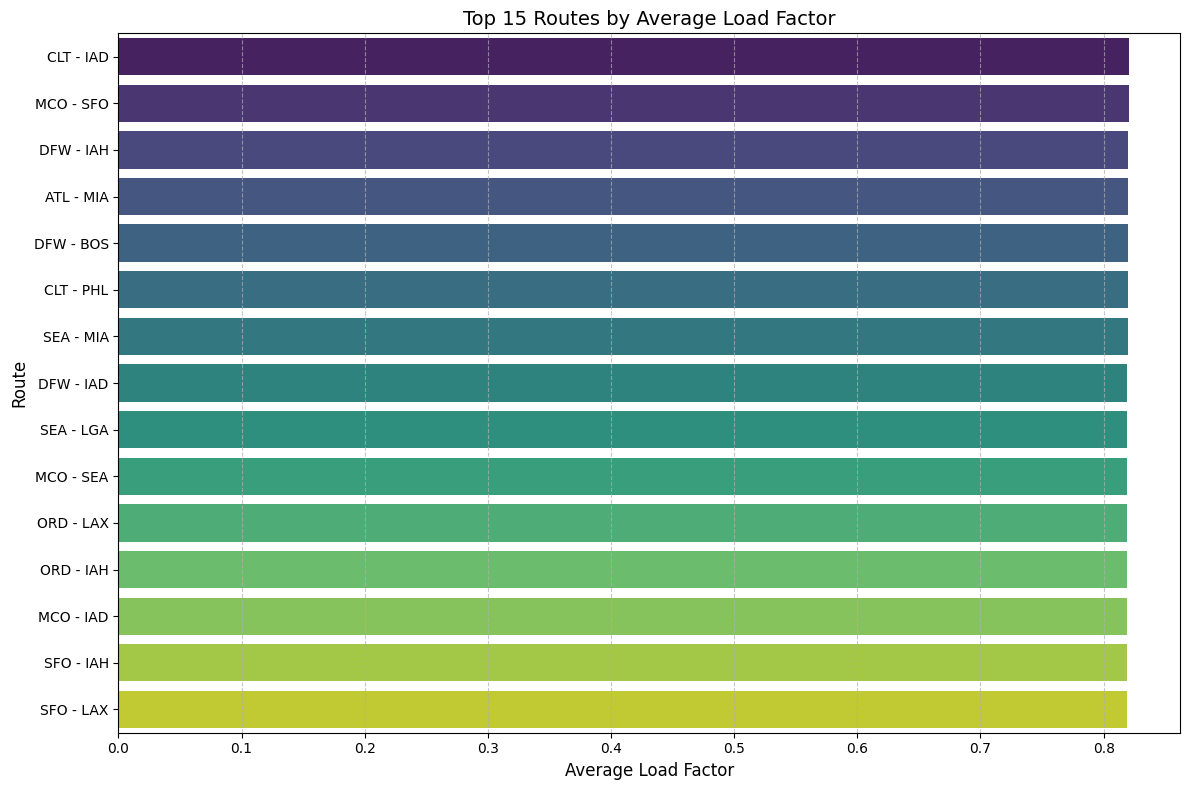

In [ ]:
# Compute mean load factor by route
df_flights['route'] = df_flights['origin'] + ' - ' + df_flights['dest']
mean_load_factor_by_route = df_flights.groupby('route')['load_factor'].mean().sort_values(ascending=False)

# Take the top 15 routes
top_15_routes = mean_load_factor_by_route.head(15)

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_routes.values, y=top_15_routes.index, palette='viridis')

plt.title('Top 15 Routes by Average Load Factor', fontsize=14)
plt.xlabel('Average Load Factor', fontsize=12)
plt.ylabel('Route', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

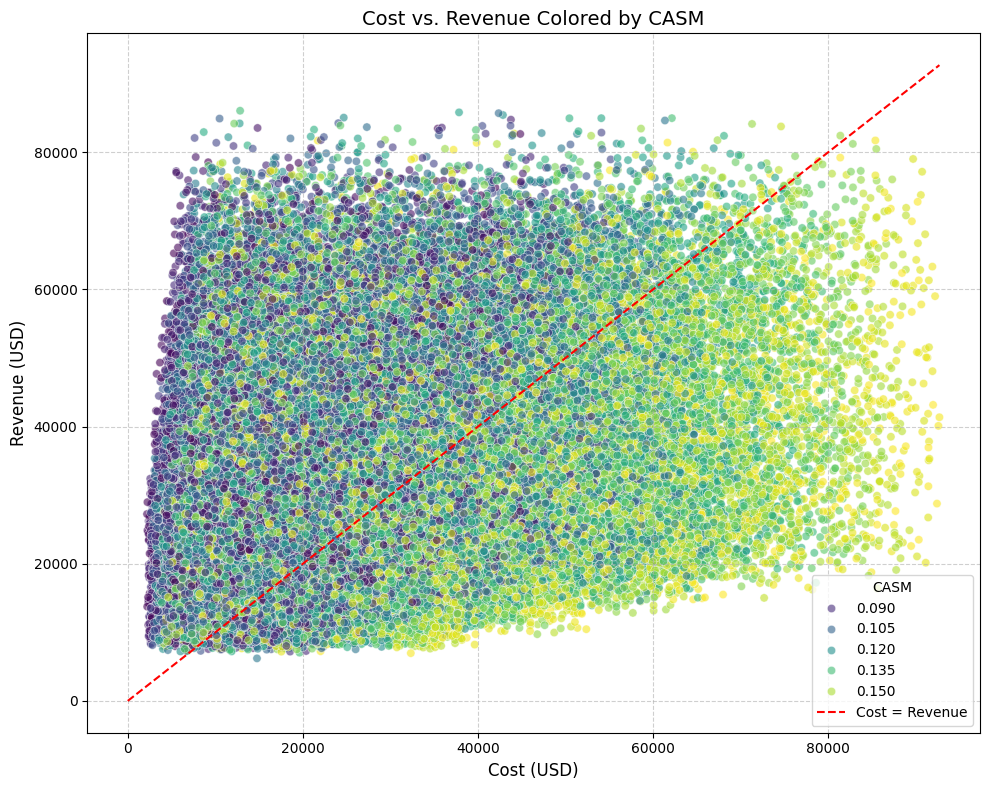

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df_flights, x='cost_usd', y='revenue_usd', hue='casm', palette='viridis', alpha=0.6)

# Add a diagonal y=x reference line
max_val = max(df_flights['cost_usd'].max(), df_flights['revenue_usd'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Cost = Revenue')

plt.title('Cost vs. Revenue Colored by CASM', fontsize=14)
plt.xlabel('Cost (USD)', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.legend(title='CASM')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### (Optional) Bring Your Own BigQuery Data
If you have airline or operations data in BigQuery, you may connect from Colab. Otherwise, skip to the **Export & Looker Studio** section.

**Auth & Client Setup (run in Colab):**
```python
from google.colab import auth
auth.authenticate_user()
print('✅ Authenticated')

from google.cloud import bigquery
client = bigquery.Client(project='YOUR_PROJECT_ID')
```

**Example Query Skeleton:**
```sql
SELECT date, carrier, origin, dest, distance_miles, seats, passengers,
       dep_delay_min, arr_delay_min, cancelled, diverted, revenue_usd, cost_usd
FROM `your_dataset.your_table`
WHERE date BETWEEN '2024-01-01' AND '2024-06-30'
```

Load to pandas:
```python
query = """
-- paste your SQL here
"""
df_bq = client.query(query).to_dataframe()
df_bq.head()
```

Unify columns with the synthetic schema if you want to reuse prompts/plots:
```python
# Example: ensure `on_time`, `load_factor`, and `casm` exist if needed
df_bq['on_time'] = (df_bq['arr_delay_min'] <= 15).astype(int)
df_bq['load_factor'] = (df_bq['passengers'] / df_bq['seats']).round(3)
df_bq['asm'] = df_bq['seats'] * df_bq['distance_miles']
df_bq['casm'] = (df_bq['cost_usd'] / df_bq['asm']).round(4)
```


### Export for Looker Studio
You can **export to CSV** and upload to Looker Studio, or you can **publish to BigQuery** and connect Looker Studio to that table.

#### Option 1 — Export CSV
Run one of the cells below to save a CSV in Colab, then download it or save to Drive.


In [ ]:
# Save synthetic dataset to CSV
df_flights.to_csv('airline_kpis_synthetic.csv', index=False)
print('📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)')

#### Option 2 — Write to BigQuery (optional)
If you prefer Looker Studio → BigQuery:

```python
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='YOUR_PROJECT_ID')
table_id = 'YOUR_PROJECT_ID.YOUR_DATASET.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)
```

**In Looker Studio:**
1. Create → Report → Add data → **BigQuery**.  
2. Select your project/dataset/table.  
3. Add charts for each KPI and configure filters (carrier, route, month).


### Dashboard Wireframe (Design First)
Sketch your intended layout before building it in Looker Studio.

```
+-----------------------------------------------------------+
| Filters: Carrier [AA/DL/UA/WN/AS] | Month [Jan–Jun]       |
+-----------------------------------------------------------+
| KPI Cards: On-Time % | Avg Delay | Cancel % | Load Factor |
+-------------------------------+---------------------------+
| Line: Avg Delay over Time     | Bar: On-Time % by Carrier |
+-------------------------------+---------------------------+
| H-Bar: Top Routes by LF       | Scatter: Cost vs Revenue  |
+-----------------------------------------------------------+
```


## Reflection & Submission

**Short Reflection (3–5 sentences):** What design decision most improved your dashboard’s clarity? What would you change next?

📝 **Your response:**
- Including short descriptiosn of columns and metrics
- Ensuring colors are chosen strategically
- Spacing in graphs

---
### Checklist
- [ ] Q1–Q3 answered in Tuesday section  
- [ ] 3–5 visualizations generated with **Gemini** in Colab  
- [ ] Synthetic or BigQuery data connected to **Looker Studio**  
- [ ] Dashboard with **filters** and **KPI cards**  
- [ ] Reflection complete  
